In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
import statistics # this is needed to check basic statistical analysis such as the mode
import seaborn as sns

In [2]:
df = pd.read_excel('cereal.xlsx') # import the dataset and name the dataset AI

In [3]:
df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbs     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [5]:
df.corr()

,calories,protein,fat,sodium,fiber,carbs,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbs,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


Top 3 
- Positive: Fiber (0.58), Protein (0.47) and Potassium (0.38) 
- Negative: Sugar (-0.76), Calories (-0.69) and Fat (-0.41)

Therefore, three top variables affecting rating are: 1) Sugar, 2) Calories, 3) Fiber

#### Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

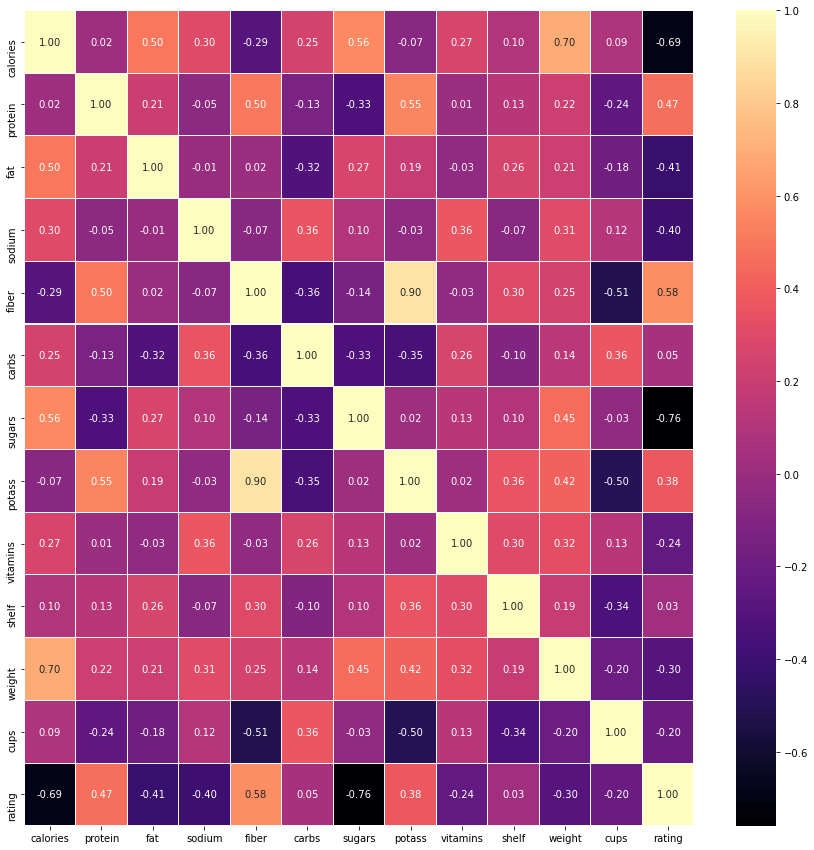

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f', cmap="magma")
plt.show

# Linear Model Building

### Define dependent variable

In [7]:
ind_vars = df.drop(["name", "mfr", "type", "rating"], axis=1)
dep_var = df[["rating"]]

In [8]:
ind_vars.columns

Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbs', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups'],
      dtype='object')

### Split the data into train and test

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.3, random_state=1
)

In [10]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 53
Number of rows in test data = 24


### Fitting a linear model

In [11]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["rating"], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.406e+15
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.19e-305
Time:                        15:04:29   Log-Likelihood:                 724.55
No. Observations:                  53   AIC:                            -1423.
Df Residuals:                      40   BIC:                            -1397.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9272   4.94e-07   1.11e+08      0.0

### Calculating Linear Regression Stats

First, create a dataframe to hold calculations

In [12]:
df_r2 = pd.DataFrame(columns = ['independent', 'r-squared', 'slope','intercept','p_value','std_err' ]) 

Second, perform the calculations for each variable
- r2
- slope
- intercept
- p-value
- standard error

In [13]:
#Calculating the stats for the variable: calories

slope, intercept, r_value, p_value, std_err = stats.linregress(df['calories'],df['rating'])

In [14]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'calories','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [15]:
#Calculating the stats for the variable: protein

slope, intercept, r_value, p_value, std_err = stats.linregress(df['protein'],df['rating'])

In [16]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'protein','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [17]:
#Calculating the stats for the variable: fat

slope, intercept, r_value, p_value, std_err = stats.linregress(df['fat'],df['rating'])              

In [18]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'calories','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [19]:
#Calculating the stats for the variable: sodium

slope, intercept, r_value, p_value, std_err = stats.linregress(df['sodium'],df['rating'])    

In [20]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'sodium','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [21]:
#Calculating the stats for the variable: fiber

slope, intercept, r_value, p_value, std_err = stats.linregress(df['fiber'],df['rating'])   

In [22]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'fiber','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [23]:
#Calculating the stats for the variable: carbs

slope, intercept, r_value, p_value, std_err = stats.linregress(df['carbs'],df['rating'])   

In [24]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'carbs','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [26]:
#Calculating the stats for the variable: sugars

slope, intercept, r_value, p_value, std_err = stats.linregress(df['sugars'],df['rating'])   

In [27]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'sugars','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [28]:
#Calculating the stats for the variable: potassium

slope, intercept, r_value, p_value, std_err = stats.linregress(df['potass'],df['rating'])   

In [29]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'potass','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [30]:
#Calculating the stats for the variable: vitamins

slope, intercept, r_value, p_value, std_err = stats.linregress(df['vitamins'],df['rating'])   

In [31]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'vitamins','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [32]:
#Calculating the stats for the variable: shelf

slope, intercept, r_value, p_value, std_err = stats.linregress(df['shelf'],df['rating'])   

In [33]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'shelf','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [34]:
#Calculating the stats for the variable: weight

slope, intercept, r_value, p_value, std_err = stats.linregress(df['weight'],df['rating'])   

In [35]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'weight','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [36]:
#Calculating the stats for the variable: cups

slope, intercept, r_value, p_value, std_err = stats.linregress(df['cups'],df['rating'])   

In [37]:
#Adding calculated stats to a dataframe 

df_r2 = df_r2.append(pd.Series({'independent':'cups','r-squared':r_value**2, 'slope': slope,                     
'intercept':intercept, 'p_value':p_value, 'std_err':std_err}), ignore_index=True)

In [38]:
#sorting values

df_r2 = df_r2.sort_values(['r-squared'],ascending=False).reset_index(drop=True)
df_r2

,independent,r-squared,slope,intercept,p_value,std_err
0,sugars,0.577106,-2.400820,59.284367,1.153428e-15,0.237311
1,calories,0.475239,-0.497013,95.788024,4.140277e-12,0.060306
2,fiber,0.341243,3.442978,35.256595,2.445250e-08,0.552375
3,protein,0.221482,6.038523,27.294918,1.566310e-05,1.307271
4,calories,0.167513,-5.712352,48.452244,2.190278e-04,1.470445
5,sodium,0.161038,-0.067243,53.402704,2.979863e-04,0.017722
6,potass,0.144526,0.074913,35.468242,6.487319e-04,0.021045
7,weight,0.088878,-27.830428,71.320203,8.453187e-03,10.289177
8,vitamins,0.057861,-0.151236,46.937621,3.509290e-02,0.070467
9,cups,0.041274,-12.263215,52.734282,7.637894e-02,6.824685


According to the r2 values, the top 3 variables that help determine ratings are: sugars, calories and fiber